## 006_Python Simulation
### State-Space Model in Python

In [1]:
import scipy.signal as signal

A = [[0, 1],
     [0, -1]]
B = [[0],
     [1]]
C = [[1, 0]]
D = 0
sys = signal.StateSpace(A, B, C, D)
print(sys)

StateSpaceContinuous(
array([[ 0,  1],
       [ 0, -1]]),
array([[0],
       [1]]),
array([[1, 0]]),
array([[0]]),
dt: None
)


# Step Response

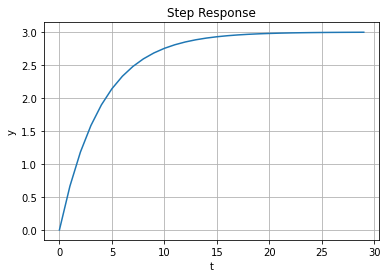

In [6]:
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np

#Simulation parameters
x0 = [0,0]

start = 0
stop = 30
step = 1
t = np.arange(start, stop, step)

N = len(t)

u = np.ones(N)

K = 3
T = 4

# State-Space Model
A = [[-1/T, 0],
     [0, 0]]
B = [[K/T],
     [0]]
c = [1, 0]
D = 0

sys = sig.StateSpace(A, B, C, D)

# Step Response
# t, y = sig.step(sys, x0, t)  # Method1

t, y, x = sig.lsim(sys, u, t) # Method2

# Plotting
plt.plot(t, y)
plt.title("Step Response")
plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.show()
 

## Separate the state and plot 

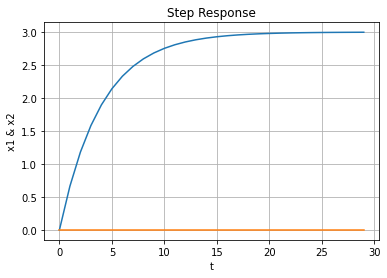

In [7]:
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np

#Simulation parameters
x0 = [0,0]

start = 0
stop = 30
step = 1
t = np.arange(start, stop, step)

N = len(t)

u = np.ones(N)

K = 3
T = 4

# State-Space Model
A = [[-1/T, 0],
     [0, 0]]
B = [[K/T],
     [0]]
c = [1, 0]
D = 0

sys = sig.StateSpace(A, B, C, D)

# Step Response
t, y, x = sig.lsim(sys, u, t) # Method2

x1 = x[:, 0]
x2 = x[:, 1]

# Plotting
plt.figure(2)
plt.plot(t, x1, t, x2)
plt.title("Step Response")
plt.xlabel("t")
plt.ylabel("x1 & x2")
plt.grid()
plt.show()

<img src="006_State_Space_Model.png" style="width: 1000px;"/>

In [8]:
import control

A = [[0, 1],
     [0, -1]]
B = [[0],
     [1]]
C = [[1, 0]]
D = 0
sys = control.ss(A, B, C, D)
print(sys)

<LinearIOSystem>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.  1.]
     [ 0. -1.]]

B = [[0.]
     [1.]]

C = [[1. 0.]]

D = [[0.]]



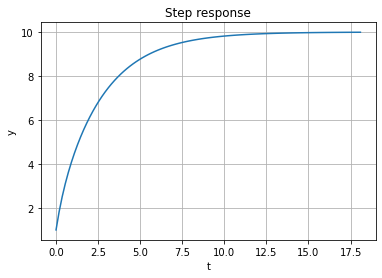

In [9]:
import control
import matplotlib.pyplot as plt

# Define State-Space model
A = [[0, 1], [-1, -3]]
B = [[1], [0]]
C = [[5, 6]]
D = [[1]]

ssmodel = control.ss(A, B, C, D)

# Step reponse for the system
t, y = control.step_response(ssmodel)

plt.plot(t, y)

plt.title("Step response")
plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import control

# Define State-Space model
A = [[0, 1], [-1, -3]]
B = [[0, 0], [2, 4]]
C = [[5, 6]]
D = [[7, 0]]

ssmodel = control.ss(A, B, C, D)

# Step response for the system
start = 0
stop = 20
step = 0.1
t = np.arange(start, stop+1, step)

# Simulation parameters
u = 1

# t, y, x = control.forced_response(ssmodel, t, u)
t, y, x = control.forced_response(ssmodel, t, u)

plt.plot(t, y)

plt.title("Step response")
plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.show()

plt.figure(2)
x1 = x[0, :]
x2 = x[1, :]


ValueError: not enough values to unpack (expected 3, got 2)

## Show Transfer Function

TransferFunctionContinuous(
array([2., 7., 4.]),
array([1., 3., 1.]),
dt: None
)


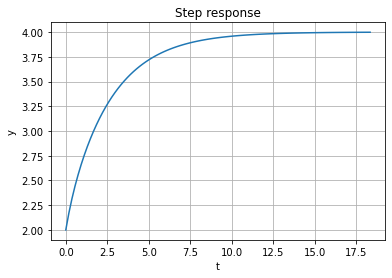

In [22]:
import scipy.signal as signal
import matplotlib.pyplot as plt

# SISO System
# Define State-Space model
A = [[0, 1], [-1, -3]]
B = [[1], [0]]
C = [[1, 0]]
D = [[2]]

# Find Transfer Function from u to y
num, den = signal.ss2tf(A, B, C, D)
H = signal.TransferFunction(num, den)
print(H)

# Step response for the system
t, y = signal.step(H)

plt.plot(t, y)
plt.title("Step response")
plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.show()


2 s^2 + 7 s + 5
---------------
 s^2 + 3 s + 1



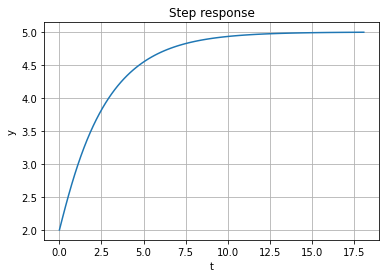

In [25]:
import control
import matplotlib.pyplot as plt

# SISO System
# Define State-Space model
A = [[0, 1], [-1, -3]]
B = [[1], [0]]
C = [[1, 0]]
D = [[2]]

# Find Transfer Function from u to y
ssmodel = control.ss(A, B, C, D)
H = control.ss2tf(ssmodel)
print(H)

# Step response for the system
t, y = control.step_response(H)

plt.plot(t, y)
plt.title("Step response")
plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.show()

## MISO: Multi Input/Single Output

<img src="007_MISO.png" style="width: 500px;"/>

TransferFunctionContinuous(
array([2.]),
array([1., 3., 1.]),
dt: None
)
TransferFunctionContinuous(
array([4.]),
array([1., 3., 1.]),
dt: None
)


c:\Users\JAMES\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\signal\filter_design.py:1628: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


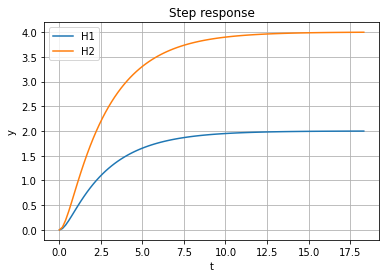

In [26]:
import scipy.signal as signal
import matplotlib.pyplot as plt

# MISO System
# Define State-Space model
A = [[0, 1], [-1, -3]]
B = [[0, 0], [2, 4]]
C = [[1, 0]]
D = [[0, 0]]

# Find Transfer Function from u1 to y
num, den = signal.ss2tf(A, B, C, D, 0)
H1 = signal.TransferFunction(num, den)
print(H1)

# Find Transfer Function from u2 to y
num, den = signal.ss2tf(A, B, C, D, 1)
H2 = signal.TransferFunction(num, den)
print(H2)

# Step response for the system
t, y = signal.step(H1)
plt.plot(t, y)
t, y = signal.step(H2)
plt.plot(t, y)

plt.title("Step response")
plt.xlabel("t")
plt.ylabel("y")
plt.legend(["H1", "H2"])
plt.grid()
plt.show()

In [31]:
import control
import matplotlib.pyplot as plt

# MISO System
# Define State-Space model
A = [[0, 1], [-1, -3]]
B = [[0, 0], [2, 4]]
C = [[1, 0]]
D = [[0, 0]]

# Find Transfer Function from u1 to y
ssmodel = control.ss(A, B, C, D)

H = control.ss2tf(ssmodel)
print(H)

H1 = H[0, 0]
print(H1)
H2 = H[0, 1]
print(H2)

# Step response for the system
t, y = signal.step_response(H1)
plt.plot(t, y)
t, y = signal.step_response(H2)
plt.plot(t, y)

plt.title("Step response")
plt.xlabel("t")
plt.ylabel("y")
plt.legend(["H1", "H2"])
plt.grid()
plt.show()

ControlMIMONotImplemented: Not implemented for MIMO systems without slycot.

## SIMO
<img src="006_SIMO.png" style="width: 500px;"/>

c:\Users\JAMES\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\signal\filter_design.py:1628: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


TransferFunctionContinuous(
array([2.]),
array([1., 3., 1.]),
dt: None
)
TransferFunctionContinuous(
array([2., 0.]),
array([1., 3., 1.]),
dt: None
)


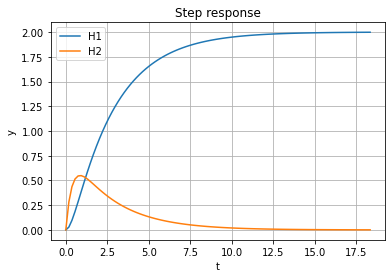

In [33]:
import scipy.signal as signal
import matplotlib.pyplot as plt

# MISO System
# Define State-Space model
A = [[0, 1], [-1, -3]]
B = [[0], [2]]
C = [[1, 0], [0, 1]]
D = [[0]]

# Find Transfer Function from u to y1
C = [[1, 0]]
num, den = signal.ss2tf(A, B, C, D)
H1 = signal.TransferFunction(num, den)
print(H1)

# Find Transfer Function from u to y2
C = [[0, 1]]
num, den = signal.ss2tf(A, B, C, D)
H2 = signal.TransferFunction(num, den)
print(H2)

# Step response for the system
t, y = signal.step(H1)
plt.plot(t, y)
t, y = signal.step(H2)
plt.plot(t, y)

plt.title("Step response")
plt.xlabel("t")
plt.ylabel("y")
plt.legend(["H1", "H2"])
plt.grid()
plt.show()

##MIMO
<img src="006_MIMO.png" style="width: 500px;"/>

c:\Users\JAMES\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\signal\filter_design.py:1628: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


TransferFunctionContinuous(
array([2.]),
array([1., 3., 1.]),
dt: None
)
TransferFunctionContinuous(
array([1., 9.]),
array([1., 3., 1.]),
dt: None
)
TransferFunctionContinuous(
array([2., 0.]),
array([1., 3., 1.]),
dt: None
)
TransferFunctionContinuous(
array([ 4., -1.]),
array([1., 3., 1.]),
dt: None
)


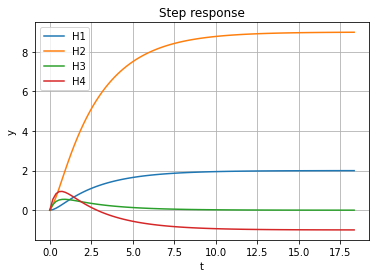

In [37]:
import scipy.signal as signal
import matplotlib.pyplot as plt

# MIMO System
# Define State-Space model
A = [[0, 1], [-1, -3]]
B = [[0, 2], [2, 4]]

D = [[0, 0]]

# Find Transfer Function from u1 to y1
C = [[1, 0]]
num, den = signal.ss2tf(A, B, C, D, 0)
H1 = signal.TransferFunction(num, den)
print(H1)

# Find Transfer Function from u2 to y1
num, den = signal.ss2tf(A, B, C, D, 1)
H2 = signal.TransferFunction(num, den)
print(H2)

C = [[0, 1]]
# Find Transfer Function from u1 to y2
num, den = signal.ss2tf(A, B, C, D, 0)
H3 = signal.TransferFunction(num, den)
print(H3)

# Find Transfer Function from u2 to y2
num, den = signal.ss2tf(A, B, C, D, 1)
H4= signal.TransferFunction(num, den)
print(H4)

# Step response for the system
t, y = signal.step(H1)
plt.plot(t, y)
t, y = signal.step(H2)
plt.plot(t, y)
t, y = signal.step(H3)
plt.plot(t, y)
t, y = signal.step(H4)
plt.plot(t, y)

plt.title("Step response")
plt.xlabel("t")
plt.ylabel("y")
plt.legend(["H1", "H2",  "H3", "H4"])
plt.grid()
plt.show()